# STUDENT NAME: DAVID OSEMEDUA NWABUISI
    
STUDENT NUMBER: 202170523

# TASK 1,2 AND 3

In [1]:
#Libraries required

import csv
import json
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#read acw data file using error handling.
try:
    with open('acw_user_data.csv', mode ='r') as acw_file:
        csv_reader = csv.reader( acw_file, delimiter=',' )
except FileNotFoundError as file_not_found_err:
    print("Something is wrong, mate!.", file_not_found_err)
except Exception as some_error:
    print('This is the Error:', some_error)

In [3]:
processed_data=[] #empty list created to contain new processed data
problematic_rows=[]#this will contain rows with null values
with open('acw_user_data.csv', mode='r') as acw_file:
    csv_reader = csv.reader( acw_file, delimiter=',' )
    for numb, row in enumerate(csv_reader):
        if numb == 0:
            headers = row
            
        else:
            if row[headers.index('Dependants')]=="":
                row[headers.index('Dependants')]="0"
                problematic_rows.append(numb) #null values in the Dependants column are replaced with 0 and the rows where they appear are identified.
              
            #grouping the data accordingly using indexing  
            record={}
            record['First Name']=row[headers.index('First Name')]
            record['Last Name']=row[headers.index('Last Name')]
            record['Age (Years)']=int(row[headers.index('Age (Years)')])
            record['Sex']=row[headers.index('Sex')]
            record['Employer Company']=row[headers.index('Employer Company')]
            record['Dependants']=int(row[headers.index('Dependants')])
            record['Distance Commuted to Work (miles)']=float(row[headers.index('Distance Commuted to Work (miles)')])
            record['Marital Status']=row[headers.index('Marital Status')]
            record['Yearly Pension (GBP)']=float(row[headers.index('Yearly Pension (GBP)')])
            record['Yearly Salary (GBP)']=float(row[headers.index('Yearly Salary (GBP)')])
            record['Address']={'Address Street':row[headers.index('Address Street')],
                               'Address City':row[headers.index('Address City')],
                               'Address Postcode':row[headers.index('Address Postcode')]}
            record['Credit Card Details']={'Credit Card Start Date':row[headers.index('Credit Card Start Date')],
                                           'Credit Card Expiry Date':row[headers.index('Credit Card Expiry Date')],
                                           'Credit Card Number':row[headers.index('Credit Card Number')],
                                           'Credit Card CVV':row[headers.index('Credit Card CVV')],
                                           'Bank IBAN':row[headers.index('Bank IBAN')]}
            record['Retired']=row[headers.index('Retired')]
            record['Vehicle Details']={'Vehicle Make':row[headers.index('Vehicle Make')],
                                           'Vehicle Model':row[headers.index('Vehicle Model')],
                                           'Vehicle Year':row[headers.index('Vehicle Year')],
                                           'Vehicle Type':row[headers.index('Vehicle Type')]}


            
            
            #append records to the processed data list
            
            processed_data.append(record)
                
print(processed_data[:3])

print(len(processed_data))


[{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age (Years)': 89, 'Sex': 'Male', 'Employer Company': 'N/A', 'Dependants': 3, 'Distance Commuted to Work (miles)': 0.0, 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': 7257.0, 'Yearly Salary (GBP)': 72838.0, 'Address': {'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ'}, 'Credit Card Details': {'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '676373692463', 'Credit Card CVV': '875', 'Bank IBAN': 'GB62PQKB71416034141571'}, 'Retired': 'True', 'Vehicle Details': {'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'}}, {'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Age (Years)': 46, 'Sex': 'Male', 'Employer Company': 'Begum-Williams', 'Dependants': 1, 'Distance Commuted to Work (miles)': 13.72, 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': 0.0, 'Yearl

In [4]:
print('problematic rows for dependants:', problematic_rows) #displaying the problematic rows

print(len(problematic_rows))

problematic rows for dependants: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]
19


# TASK 4

In [5]:
with open('processed.json', mode='w') as entry_file:
    json.dump( processed_data, entry_file ) #writing the processed data to a JSON file

# TASK 5

In [6]:
retired_data = []
#here we check the status of retirement. If the individual is retired and doesn't have an employer company,we fetch the records

for i in processed_data:
    if i['Retired'] == 'True' and i['Employer Company'] == 'N/A':
        retired_data.append(i) #append to the retired data list.

print (retired_data[:3])

[{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age (Years)': 89, 'Sex': 'Male', 'Employer Company': 'N/A', 'Dependants': 3, 'Distance Commuted to Work (miles)': 0.0, 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': 7257.0, 'Yearly Salary (GBP)': 72838.0, 'Address': {'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ'}, 'Credit Card Details': {'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '676373692463', 'Credit Card CVV': '875', 'Bank IBAN': 'GB62PQKB71416034141571'}, 'Retired': 'True', 'Vehicle Details': {'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'}}, {'First Name': 'Clive', 'Last Name': 'Evans', 'Age (Years)': 67, 'Sex': 'Male', 'Employer Company': 'N/A', 'Dependants': 1, 'Distance Commuted to Work (miles)': 0.0, 'Marital Status': 'single', 'Yearly Pension (GBP)': 28075.0, 'Yearly Salary (GBP)': 27964.0, 'Addr

In [7]:
employed_data = []
#here we check the status of employment. If the individual is not retired and has an employer company, then we fetch the records
for i in processed_data:
    if i['Retired'] == 'False' and i['Employer Company'] != 'N/A':
        employed_data.append(i) #append to the employed data list created.

print (employed_data[:5])

[{'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Age (Years)': 46, 'Sex': 'Male', 'Employer Company': 'Begum-Williams', 'Dependants': 1, 'Distance Commuted to Work (miles)': 13.72, 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': 0.0, 'Yearly Salary (GBP)': 54016.0, 'Address': {'Address Street': '00 Wheeler wells', 'Address City': 'Chapmanton', 'Address Postcode': 'L2 7BT'}, 'Credit Card Details': {'Credit Card Start Date': '08/12', 'Credit Card Expiry Date': '11/26', 'Credit Card Number': '4529436854129855', 'Credit Card CVV': '583', 'Bank IBAN': 'GB37UMCO54540228728019'}, 'Retired': 'False', 'Vehicle Details': {'Vehicle Make': 'Nissan', 'Vehicle Model': 'ATS', 'Vehicle Year': '1996', 'Vehicle Type': 'Coupe'}}, {'First Name': 'Antony', 'Last Name': 'Jones', 'Age (Years)': 22, 'Sex': 'Male', 'Employer Company': 'Hill-Wright', 'Dependants': 1, 'Distance Commuted to Work (miles)': 16.02, 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': 0.0, 'Y

In [8]:
with open('Retired.json', mode='w') as entry_file:
    json.dump( retired_data, entry_file ) #writing the retired records to a JSON file

In [9]:
with open('Employed.json', mode='w') as entry_file:
    json.dump( employed_data, entry_file ) #writing the employed records to a JSON file

# TASK 6

In [25]:
remove_ccard = [] #creating the empty list to contain credit card expiry records
for i in processed_data:
    startd = i['Credit Card Details']['Credit Card Start Date'].split('/')
    expd = i['Credit Card Details']['Credit Card Expiry Date'].split('/')
    check = int(expd[1])-int(startd[1])
        
    if check > 10: #checks if the difference between the issue and expiry date is greater than 10years.
        card_det=i['First Name'],i['Last Name'],i['Credit Card Details'] #indexing the required details
        remove_ccard.append(card_det) #appending the details to the initial empty list

In [26]:
with open('remove_ccard.json', mode='w') as card_file:
    json.dump( remove_ccard, card_file ) #writing the retired records to a JSON file

# TASK 7

In [27]:
#read the processed JSON file
with open('processed.json', mode='r') as viewfile:
    view = json.load(viewfile)

In [28]:
#creating a new attribute called 'Salary-Commute', which is the salary per mile of distance commuted to work
for i in processed_data:
#to check distance commuted to work is greater than 1 and compute salary per distance. I'll limit this to 3 decimal places
    if i['Distance Commuted to Work (miles)'] > 1:
        i['Salary-Commute'] = round(i['Yearly Salary (GBP)'] / i['Distance Commuted to Work (miles)'], 3)
    else: #if the distance commuted is less than or equal to 1, we just make it their salary
        i['Salary-Commute'] = i['Yearly Salary (GBP)']

In [29]:
#sorting the Salary-Commute records in ascending order
commute_ascending = sorted(processed_data, key=lambda d: d['Salary-Commute'])

In [30]:
print(commute_ascending[:3])

[{'First Name': 'Graeme', 'Last Name': 'Jackson', 'Age (Years)': 52, 'Sex': 'Male', 'Employer Company': 'Smith, Birch and Burke', 'Dependants': 2, 'Distance Commuted to Work (miles)': 5.52, 'Marital Status': 'single', 'Yearly Pension (GBP)': 0.0, 'Yearly Salary (GBP)': 17046.0, 'Address': {'Address Street': 'Studio 9 Reid lights', 'Address City': 'South Ryan', 'Address Postcode': 'E27 9GY'}, 'Credit Card Details': {'Credit Card Start Date': '06/14', 'Credit Card Expiry Date': '04/29', 'Credit Card Number': '4713424668774153', 'Credit Card CVV': '3053', 'Bank IBAN': 'GB09ELJH35362236053720'}, 'Retired': 'False', 'Vehicle Details': {'Vehicle Make': 'Chevrolet', 'Vehicle Model': 'Rally Wagon 1500', 'Vehicle Year': '2011', 'Vehicle Type': 'SUV'}, 'Salary-Commute': 3088.043}, {'First Name': 'Janet', 'Last Name': 'Quinn', 'Age (Years)': 30, 'Sex': 'Female', 'Employer Company': 'Wood-Davies', 'Dependants': 1, 'Distance Commuted to Work (miles)': 5.64, 'Marital Status': 'married or civil partn

In [31]:
#write to a new JSON file, called commute.
with open('commute.json', mode='w') as newcommutefile:
    json.dump(commute_ascending, newcommutefile)

# DATA VISUALISATION TASKS

In [32]:
df = pd.read_csv('acw_user_data.csv')

# TASK 1

In [33]:
#Data series for Salary and Age


#yearly average salary
salary = df['Yearly Salary (GBP)']
mean_salary = salary.mean()
print(f"The mean annual salary is {mean_salary:.2f} GBP")

#Median age is derived below
Age = df['Age (Years)']
median_age = Age.median()
print(f"The median age is {int(median_age)}")

The mean annual salary is 57814.08 GBP
The median age is 54


# TASK 2

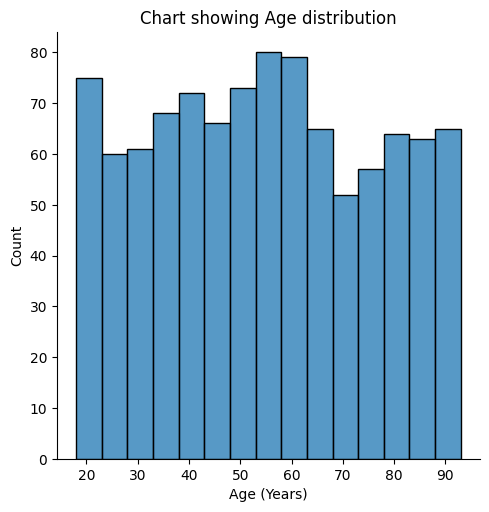

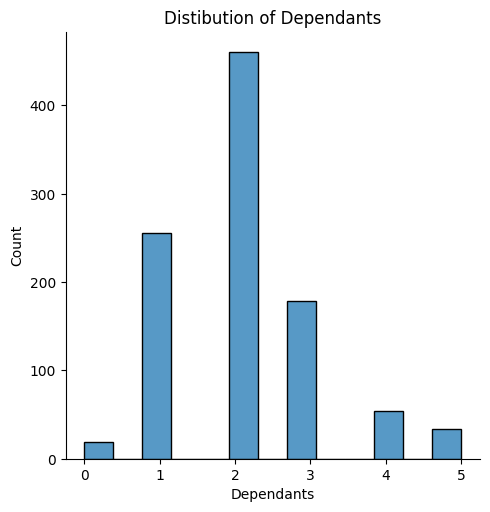

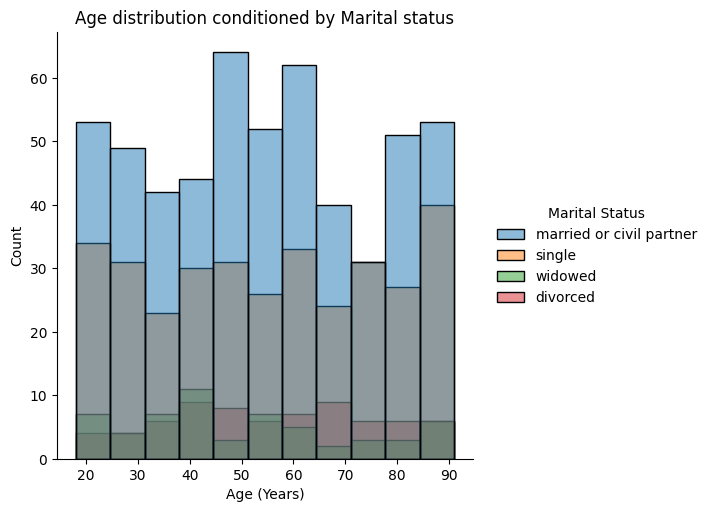

In [34]:
age_plot = sns.displot(df, x='Age (Years)', binwidth = 5) #15 bins for a bin_width of 5
age_plot.set(title ="Chart showing Age distribution")

#replacing the NaN values in the Dependant column with 0, fixes the error
dependants_plot = sns.displot(df, x=df['Dependants'].fillna(0))
dependants_plot.set(title ="Distibution of Dependants")

#Conditioned on Marital status, we take the hue using Marital Status column
age_maritalstatus_plot = sns.displot(df, x='Age (Years)', hue='Marital Status')
age_maritalstatus_plot.set(title ="Age distribution conditioned by Marital status")

# TASK 3

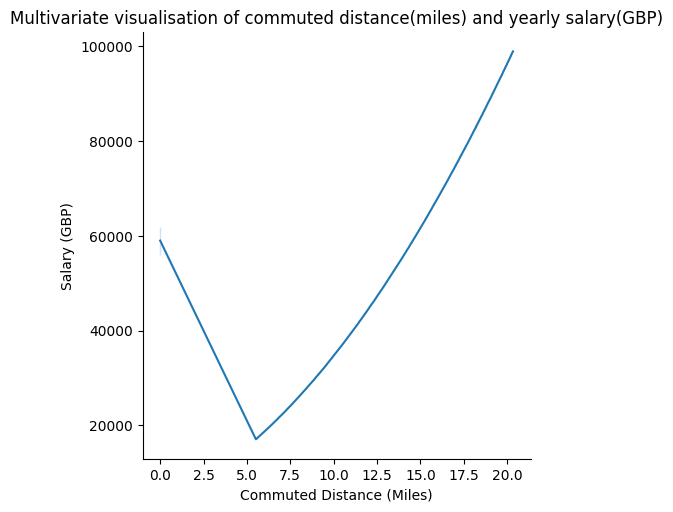

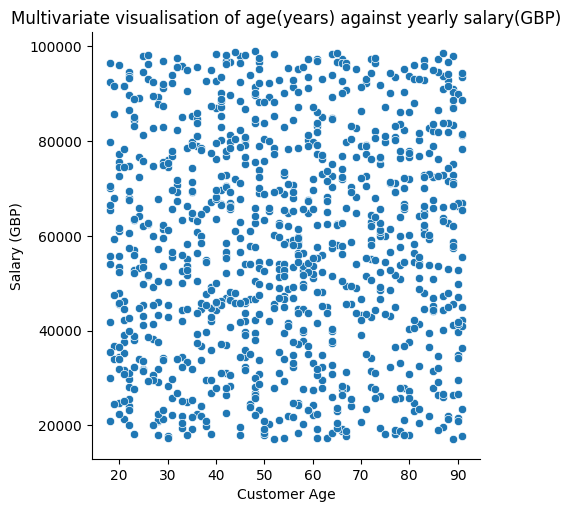

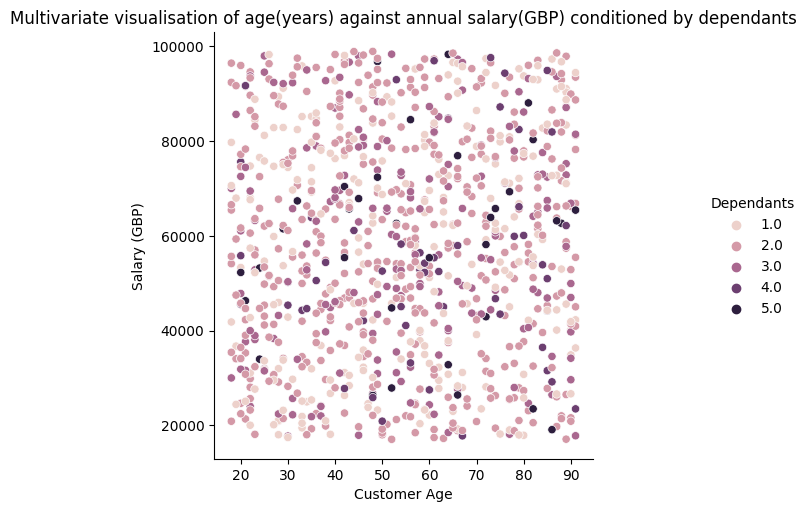

In [36]:
#This gives the distribution of Distance Commuted to Work (miles) against Yearly Salary (GBP). A line plot was used to visualise the data.
commuted_salary_plot = sns.relplot(data=df, x = 'Distance Commuted to Work (miles)', y = 'Yearly Salary (GBP)', kind = 'line')
commuted_salary_plot.set_axis_labels('Commuted Distance (Miles)', 'Salary (GBP)')
commuted_salary_plot.set(title ="Multivariate visualisation of commuted distance(miles) and yearly salary(GBP)")

#This gives the distribution of the population's Age (Years) against Yearly Salary (GBP)
age_salary_plot = sns.relplot(data=df, x = 'Age (Years)', y = 'Yearly Salary (GBP)')
age_salary_plot.set_axis_labels('Customer Age', 'Salary (GBP)')
age_salary_plot.set(title ="Multivariate visualisation of age(years) against yearly salary(GBP)")

#This visualises the distribution of the population's Age (Years) against Yearly Salary (GBP), with respect to number of dependants
agesalary_2_plot = sns.relplot(data=df, x = 'Age (Years)', y = 'Yearly Salary (GBP)', hue= 'Dependants')
agesalary_2_plot.set_axis_labels('Customer Age', 'Salary (GBP)')
agesalary_2_plot.set(title ="Multivariate visualisation of age(years) against annual salary(GBP) conditioned by dependants")

# TASK 4

In [37]:
#creating a dictionary to hold all plotted images to one place
figures_to_save = {}
figures_to_save["./age.png"] = age_plot
figures_to_save["./dependants.png"] = dependants_plot
figures_to_save["./age_maritalstatus.png"] = age_maritalstatus_plot
figures_to_save["./commuted_salary.png"] = commuted_salary_plot
figures_to_save["./age_salary.png"] = age_salary_plot
figures_to_save["./agesalary_2.png"] = agesalary_2_plot

In [39]:
#iterate over the dictionary,calling savefig on each value in the dictionary.
for k, v in figures_to_save.items():
    v.savefig(k)